# Exercise: a bit more data processing
- 나중에 유용하게 사용할 열을 추가하고
- 다른 열의 값을 변경하고
- 특정 열을 완전히 삭제

In [1]:
import pandas as pd

# 데이터 로드
file_path = 'amazon_uk_shoes_products_dataset_2021_12.csv'
df = pd.read_csv(file_path)

# 데이터 확인
df.head()


,url,product_name,reviewer_name,review_title,review_text,review_rating,verified_purchase,review_date,helpful_count,uniq_id,scraped_at
0,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Jocelyn McSayles,Love em,Love these. Was looking for converses and thes...,5.0,True,Reviewed in the United States on 2 June 2020,2 people found this helpful,36eae4e5-2894-5279-a0b7-d2b330e2b814,24/12/2021 02:26:25
1,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Kenia Rivera,The plastic ripped,"The shoes are very cute, but after the 2nd day...",2.0,True,Reviewed in the United States on 28 October 2021,NaN,f4778bb8-3070-5cb1-b5aa-ffce41a97b57,24/12/2021 02:26:25
2,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Chris Souza,Good quality,Good quality,5.0,True,Reviewed in the United States on 20 January 2021,NaN,db5a7525-d40b-5265-84d8-df4f29837a3b,24/12/2021 02:26:25
3,https://www.amazon.co.uk/dp/B07SBX32T5,Klasified Women's Transparent Clear Sneaker Sh...,Amazon Customer,Good,Great,5.0,True,Reviewed in the United States on 22 April 2021,NaN,75a42851-6462-54b5-988a-27d336221943,24/12/2021 02:26:25
4,https://www.amazon.co.uk/dp/B08SW434MG,"GUESS Women's Bradly Gymnastics Shoe, White, 7 UK",Graziella,PERFETTE!!,Ho scelto il modello bianco con rifinitura die...,5.0,True,Reviewed in Italy on 2 April 2021,2 people found this helpful,232dee43-849e-5d06-ba05-efb3f4814714,24/12/2021 02:26:25


In [2]:
import pandas as pd
from nltk.corpus import stopwords

# 데이터 로드
file_path = 'amazon_uk_shoes_products_dataset_2021_12.csv'
df = pd.read_csv(file_path)

# 필요한 열만 선택
df = df[['review_text', 'review_rating', 'verified_purchase']]

# 데이터 확인
df.head()



,review_text,review_rating,verified_purchase
0,Love these. Was looking for converses and thes...,5.0,True
1,"The shoes are very cute, but after the 2nd day...",2.0,True
2,Good quality,5.0,True
3,Great,5.0,True
4,Ho scelto il modello bianco con rifinitura die...,5.0,True


In [3]:
#데이터 정보확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6823 entries, 0 to 6822
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_text        6814 non-null   object 
 1   review_rating      6823 non-null   float64
 2   verified_purchase  6823 non-null   bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 113.4+ KB


In [4]:
df = df.dropna(subset=['review_text'])

# 결측값 제거 후 확인
print(df.isnull().sum())

df.info()

review_text          0
review_rating        0
verified_purchase    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 6814 entries, 0 to 6822
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_text        6814 non-null   object 
 1   review_rating      6814 non-null   float64
 2   verified_purchase  6814 non-null   bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 166.4+ KB


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# NLTK 리소스 다운로드
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 표제어 추출기 초기화
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 텍스트를 소문자로 변환하고 토큰화합니다.
    words = word_tokenize(text.lower())
    # 불용어 제거 전 텍스트를 저장
    original_words = ' '.join(words)
    # 알파벳 문자로만 구성된 단어 중 불용어가 아닌 단어를 필터링합니다.
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]
    # 불용어 제거 후 텍스트를 저장
    filtered_text = ' '.join(filtered_words)
    # 표제어 추출
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    lemmatized_text = ' '.join(lemmatized_words)
    return original_words, filtered_text, lemmatized_text
    

# review_text 열에 대해 preprocess_text 함수를 적용하여 불용어 제거 전후 및 표제어 추출 후의 텍스트를 생성합니다.
df[['original_review', 'filtered_review', 'lemmatized_review']] = df['review_text'].apply(lambda x: pd.Series(preprocess_text(x)))
print("\n")
# 예시로 불용어 제거 전후 및 표제어 추출 후의 몇 개의 리뷰를 출력합니다.
for i in range(2):
    print(f"Original Review {i+1}: {df['original_review'].iloc[i*1]}")
    print(f"Filtered Review {i+1}: {df['filtered_review'].iloc[i*1]}")
    print(f"Lemmatized Review {i+1}: {df['lemmatized_review'].iloc[i*1]}")
    print("\n")


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!




Original Review 1: love these . was looking for converses and these were half the price and so unique— i ’ ve never seen clear shoes like these ; they fit great . the plastic takes a little getting used to but the style is so worth it .
Filtered Review 1: love looking converses half price never seen clear shoes like fit great plastic takes little getting used style worth
Lemmatized Review 1: love looking converse half price never seen clear shoe like fit great plastic take little getting used style worth


Original Review 2: the shoes are very cute , but after the 2nd day of wearing them the tongue started ripping . after the 3rd day of wearing them the plastic on the side ripped . they could have ripped bc i was wearing them to work and i do a lot of walking at work . if you ’ re going to buy these i don ’ t recommend wearing them on days where you will do a lot of walking or they might rip
Filtered Review 2: shoes cute 2nd day wearing tongue started ripping 3rd day wearing plastic 

In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.model_selection import train_test_split

# NLTK 리소스 다운로드
nltk.download('vader_lexicon')

# VADER 초기화
sid = SentimentIntensityAnalyzer()

# 리뷰 텍스트에 대한 감정 점수 계산
df['sentiment_score'] = df['review_text'].apply(lambda text: sid.polarity_scores(text)['compound'])

# 감정 점수로부터 레이블 생성
def categorize_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['sentiment_score'].apply(categorize_sentiment)

# 특징(feature)와 레이블(label) 설정
X = df[['review_text', 'sentiment_score']]
y = df['sentiment']

# 학습 및 테스트 세트로 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# 학습 및 테스트 세트의 크기 출력
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# 학습 세트와 테스트 세트의 일부 데이터 출력
print("\nSample training data:")
print(X_train.head())
print(y_train.head())

print("\nSample test data:")
print(X_test.head())
print(y_test.head())


Train set size: 5451
Test set size: 1363

Sample training data:
                                            review_text  sentiment_score
1621  After this purchase I'm not sure I'll purchase...           0.9253
3213           La medida es excelente muy buena calidad           0.0000
4154  My son plays futsal several times a week and i...           0.8519
4477  They are very stiff, about 1/2 size too large,...           0.5984
3666  These fit true to size and can be worn with or...           0.6130
1621    positive
3213     neutral
4154    positive
4477    positive
3666    positive
Name: sentiment, dtype: object

Sample test data:
                                            review_text  sentiment_score
1890                                          Love them           0.6369
2946  I’m a 6.5 narrow, I bought these because I nee...          -0.5451
840   Probably great but too hard to get on their fe...           0.9415
2410                           Pefectos...quiero otros!           0.000

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# TF-IDF 벡터화
tfidf = TfidfVectorizer()

# 로지스틱 회귀 모델
from sklearn.linear_model import LogisticRegression

# 파이프라인 설정
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', LogisticRegression(max_iter=1000))
])


In [9]:
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 그리드 설정
param_grid = {
    'tfidf__max_df': [0.8, 0.9, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'clf__C': [0.1, 1, 10]
}

# 그리드 서치 설정
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# 모델 학습
grid_search.fit(X_train['review_text'], y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)


Best parameters found:  {'clf__C': 10, 'tfidf__max_df': 0.8, 'tfidf__ngram_range': (1, 1)}
Best cross-validation accuracy:  0.8574607926403687


In [10]:
from sklearn.metrics import classification_report, accuracy_score

# 테스트 세트 예측
y_pred = grid_search.predict(X_test['review_text'])

# 분류 리포트 출력
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 정확도 출력
print("Test Accuracy: ", accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

    negative       0.79      0.74      0.76       225
     neutral       0.89      0.88      0.88       375
    positive       0.91      0.93      0.92       763

    accuracy                           0.89      1363
   macro avg       0.86      0.85      0.86      1363
weighted avg       0.89      0.89      0.89      1363

Test Accuracy:  0.8870139398385913


In [14]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# TF-IDF 벡터화
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['review_text'])
y = df['sentiment']

# 훈련 세트와 테스트 세트로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 초기화 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 테스트 세트 예측 확률 계산
y_pred_proba = model.predict_proba(X_test)

# ROC-AUC 계산
roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # ovr: One-vs-Rest 방식

print(f"ROC-AUC Score: {roc_auc}")



ROC-AUC Score: 0.9494892097236032


오버피팅과 언더피팅을 논의하고 이를 해결하는 방법 학습
오버피팅은 너무 많은것을 학습시켜서 학습자료를 제외한 나머지를 제대로 인지하지 못하는것이고 언더피팅은 너무 적은 데이터를 학습시켜서 대상이 아닌 자료도 대상으로 판단하는 것인데
ROC-AUC 점수가 높게 나와서 오버피팅과 언더피팅을 하지않아도 될것같다.

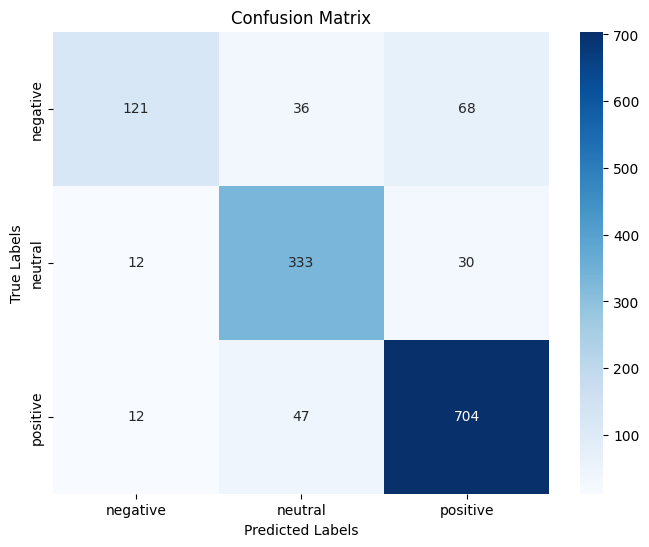

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 예측값과 실제값을 기반으로 혼동 행렬 계산
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred, labels=model.classes_)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


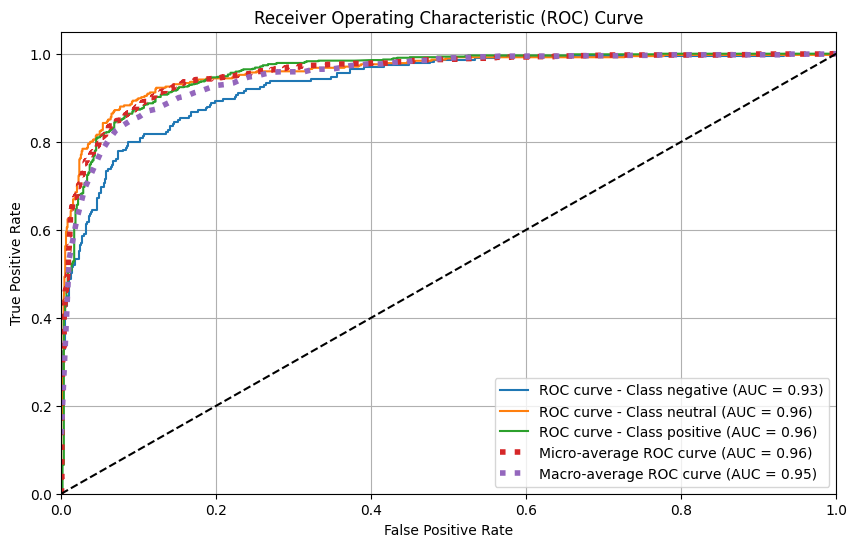

Micro-average ROC-AUC Score: 0.96
Macro-average ROC-AUC Score: 0.95


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
import pandas as pd

# 각 클래스에 대한 ROC 곡선 시각화
plt.figure(figsize=(10, 6))

# 각 클래스별 ROC 곡선 그리기
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(grid_search.best_estimator_.named_steps['clf'].classes_)):
    class_label = grid_search.best_estimator_.named_steps['clf'].classes_[i]
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test == class_label, y_pred_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])
    plt.plot(fpr[class_label], tpr[class_label], label=f'ROC curve - Class {class_label} (AUC = {roc_auc[class_label]:.2f})')

# 마이크로 평균 ROC 곡선 그리기
fpr_micro, tpr_micro, _ = roc_curve(pd.get_dummies(y_test).values.ravel(), y_pred_proba.ravel())
roc_auc_micro = auc(fpr_micro, tpr_micro)
plt.plot(fpr_micro, tpr_micro, label=f'Micro-average ROC curve (AUC = {roc_auc_micro:.2f})', linestyle=':', linewidth=4)

# 마크로 평균 ROC 곡선 그리기
mean_fpr = np.linspace(0, 1, 100)
tpr_macro = np.zeros_like(mean_fpr)
for class_label in grid_search.best_estimator_.named_steps['clf'].classes_:
    tpr_macro += np.interp(mean_fpr, fpr[class_label], tpr[class_label])
tpr_macro /= len(grid_search.best_estimator_.named_steps['clf'].classes_)
roc_auc_macro = auc(mean_fpr, tpr_macro)
plt.plot(mean_fpr, tpr_macro, label=f'Macro-average ROC curve (AUC = {roc_auc_macro:.2f})', linestyle=':', linewidth=4)

# 랜덤 모델의 ROC 곡선 그리기
plt.plot([0, 1], [0, 1], 'k--')

# 그래프 설정
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# ROC-AUC 점수 출력
print(f"Micro-average ROC-AUC Score: {roc_auc_micro:.2f}")
print(f"Macro-average ROC-AUC Score: {roc_auc_macro:.2f}")

